## Raw Data Handling (mini-project)

**The data is in multiple files stored in various folders. Create a united dataframe to store all the data. Add to the dataframe columns DATE and NAME, rows should be names of the corresponding folder names.**  
 **Folders tree is shown below:**
<img src='data_tree.png'>

**The resulting dataframe should have the following columns with data:**  
* product_id 
* quantity
* name
* date 

In [3]:
import pandas as pd
import os


# checking current working directory and pointing to the folder with our data
cwd = os.getcwd()
data_folder = 'data_mini_project'

# creating list of folders
folders = []
for path, folder, file in os.walk(cwd + '/' + data_folder):
    if file:
        file = file[0]
    if folder:
        folders.append(folder)
    
    
# creating dict with inner folders structure (key - for date, value - for names)    
folders_dict = {key: [] for key in folders[0]}
i = 1
for key in folders_dict.keys():
    folders_dict[key] = folders[i]
    i += 1


# creating an empty dataframe
df = pd.DataFrame()


# reading csv files one by one and appending data to our dataframe
for key in folders_dict:
    for name in folders_dict[key]:
        df_temp = pd.read_csv(cwd + '/' + data_folder + '/' + key + '/' + name + '/' + file, index_col=0)
        df_temp['name'] = name
        df_temp['date'] = key
        df = pd.concat([df, df_temp])

        
# resetting indexes to have an index through
df.reset_index(drop=True)

,product_id,quantity,name,date
0,79,3,Anton_Smirnov,2020-12-09
1,33,1,Anton_Smirnov,2020-12-09
2,81,3,Anton_Smirnov,2020-12-09
3,70,4,Anton_Smirnov,2020-12-09
4,56,5,Alexey_Smirnov,2020-12-09
...,...,...,...,...
156,73,5,Alexey_Fedorov,2020-12-08
157,34,1,Alexey_Fedorov,2020-12-08
158,71,1,Alexey_Fedorov,2020-12-08
159,18,2,Alexey_Fedorov,2020-12-08


**To check that you've created a proper dataset, please, show the total quantity of items. The sum should be equal to 480**

In [546]:
# checking the overal quantity of items
df.quantity.sum()

480

**Find out the user(s) who bought the most nubmer of items. If there is more than one such a user, list them in alphabetical order.**

In [4]:
best_user = df.groupby(['name'], as_index=False) \
    .agg({'quantity': 'sum'}) \
    .sort_values('name') \
    .query('quantity == quantity.max()') \
    .name \
    .to_list()

# string representation
', '.join(best_user)

'Alexey_Smirnov, Petr_Smirnov'

**Find top-10 sold product_ids and plot the data**

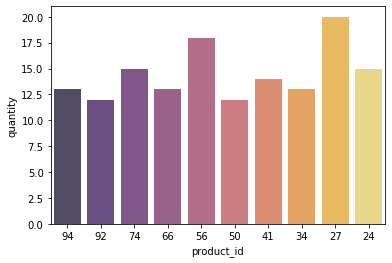

In [619]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


top_10 = df.groupby(['product_id'], as_index=False) \
           .quantity.sum() \
           .sort_values('quantity', ascending=False).head(10)

# a list for reverse id oreder sorting
for_order = sorted([24, 27, 34, 41, 50, 56, 66, 74, 92, 94], reverse=True)

# alpha - transparency parameter
ax = sns.barplot(x='product_id', y='quantity',data=top_10, palette='inferno', alpha=0.75, order=for_order)

**Check daily sales of items. Plot the data.**

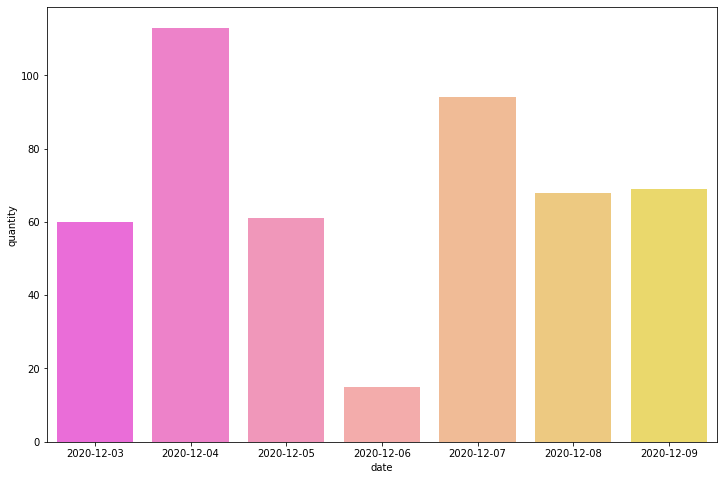

In [638]:
days = df.groupby('date', as_index=False).agg({'quantity': 'sum'})

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='date', y='quantity', data=days, palette='spring', alpha=0.75)

**Find users who has bought the same product more than once in different days**

In [672]:
fav_products = ( 
    df.reset_index(drop=True) 
      .drop_duplicates(subset=['product_id', 'date', 'name'])  # removing duplicates by product_id, date, name -- in case someone bought the same product more than once per day
      .groupby(['name', 'product_id'], as_index=False)  # grouping by name and product_id
      .agg({'date': 'count'})  # counting number of different dates when name and product_id are the same
      .query('date  > 1')  # filtering values less than one two obtain users who bought same products on different days
               )  

fav_products

,name,product_id,date
37,Anton_Ivanov,15,2
92,Petr_Fedorov,94,2
